In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
import statsmodels.formula.api as smf

In [ ]:
df = pd.read_csv('cleaned_data.csv')
df

,Title,Organization,URL,Rating,Languages Available,Enroll Information,Taught Language,Difficulty,Type,Duration,Data Science Skills Count,Engineering and Programming Skills Count,Mathematical Theory and Problem Solving Skills Count,Skills Count,Quizzes,Assignments
0,Google Data Analytics,Google,https://www.coursera.org/professional-certific...,4.8,11,2468706,English,Beginner,Professional Certificate,3 - 6 Months,9,3,1,25,0,0
1,Google Cybersecurity,Google,https://www.coursera.org/professional-certific...,4.8,11,759433,English,Beginner,Professional Certificate,3 - 6 Months,6,6,0,13,0,0
2,Google Project Management:,Google,https://www.coursera.org/professional-certific...,4.8,11,1807675,English,Beginner,Professional Certificate,3 - 6 Months,1,2,1,24,0,0
3,Google Digital Marketing & E-commerce,Google,https://www.coursera.org/professional-certific...,4.8,11,831347,English,Beginner,Professional Certificate,3 - 6 Months,3,0,1,19,0,0
4,Google IT Support,Google,https://www.coursera.org/professional-certific...,4.8,11,1695991,English,Beginner,Professional Certificate,3 - 6 Months,2,6,2,19,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,"Innovation Through Design: Think, Make, Break,...",The University of Sydney,https://www.coursera.org/learn/innovation-thro...,4.7,22,161059,English,Beginner,Course,1 - 3 Months,1,0,0,1,0,8
985,Finding Your Professional Voice: Confidence & ...,University of London,https://www.coursera.org/learn/finding-your-pr...,4.7,22,128593,English,Beginner,Course,1 - 4 Weeks,4,1,3,28,0,4
986,Gender Analytics: Gender Equity through Inclus...,University of Toronto,https://www.coursera.org/specializations/gende...,4.8,21,6634,English,Beginner,Specialization,3 - 6 Months,1,0,2,25,0,0
987,Habilidades Gerenciales,Universidad Nacional Autónoma de México,https://www.coursera.org/specializations/habil...,4.8,0,30607,Spanish,Beginner,Specialization,3 - 6 Months,2,6,0,17,0,0


# **Analysis of Enrollment Numbers and Course Ratings**

In [ ]:
top_courses = df.sort_values(by='Enroll Information', ascending=False).head(10)
print(top_courses[['Organization', 'Enroll Information']])

                   Organization  Enroll Information
192             Yale University             4793429
266     Deep Teaching Solutions             3916776
231      University of Michigan             3208300
22                       Google             2929734
243  University of Pennsylvania             2587981
0                        Google             2468706
267                      Google             2468706
862                      Google             2468706
729                      Google             2468706
711                      Google             2468706


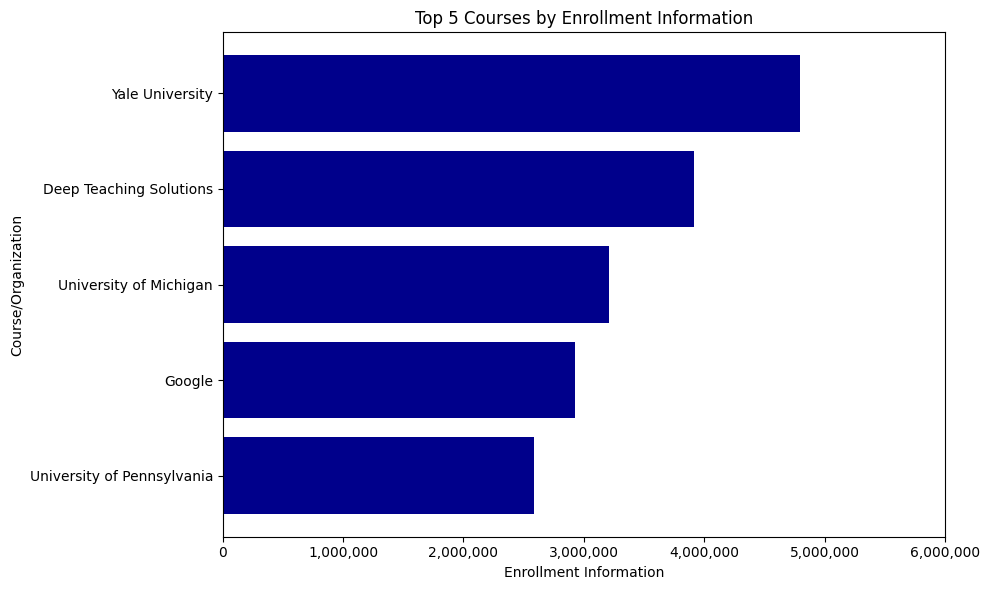

In [ ]:
top_courses = df.sort_values(by='Enroll Information', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_courses['Organization'], top_courses['Enroll Information'], color='darkblue')
plt.xticks(
    ticks=plt.xticks()[0],
    labels=[f'{int(tick):,}' for tick in plt.xticks()[0]],
    fontsize=10
)

plt.xlabel('Enrollment Information')
plt.ylabel('Course/Organization')
plt.title('Top 5 Courses by Enrollment Information')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
top_rated_courses = df.sort_values(by='Rating', ascending=False).head(10)
print(top_rated_courses[['Organization', 'Rating']])

                         Organization  Rating
503             University of Toronto     5.0
182               Stanford University     4.9
655                   Yale University     4.9
301                   Rice University     4.9
405                            Google     4.9
406            University of Michigan     4.9
804   University of California, Davis     4.9
805          Arizona State University     4.9
647  University of California, Irvine     4.9
933             University of Alberta     4.9


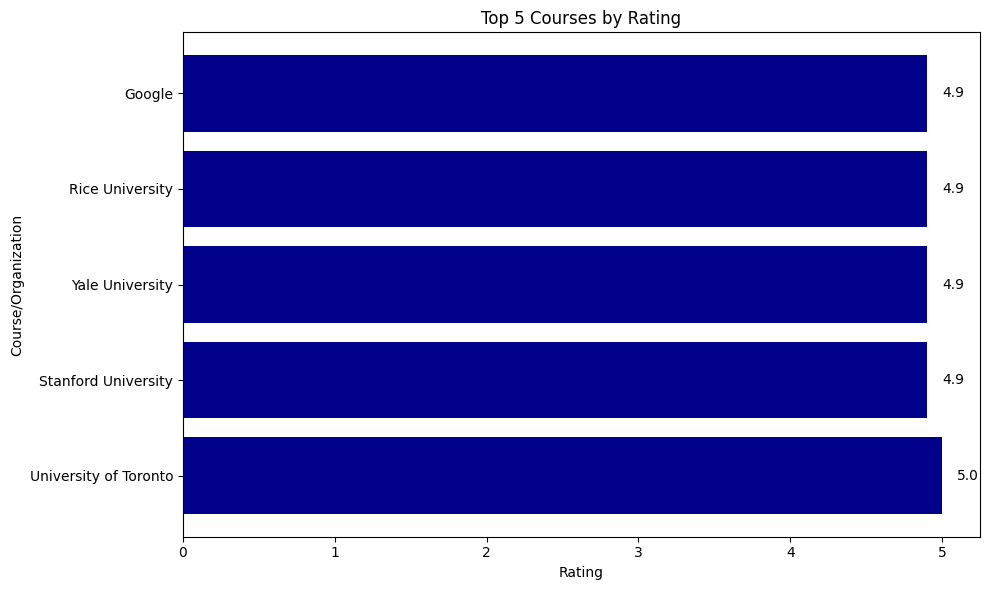

In [ ]:
top_rated_courses = df.sort_values(by='Rating', ascending=False).head(5)
plt.figure(figsize=(10, 6))
bars = plt.barh(top_rated_courses['Organization'], top_rated_courses['Rating'], color='darkblue')
plt.xlabel('Rating')
plt.ylabel('Course/Organization')
plt.title('Top 5 Courses by Rating')
for bar in bars:
    plt.text(
        bar.get_width() + 0.1,
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():.1f}',
        va='center'
    )
plt.tight_layout()
plt.show()

In [ ]:
median_enrollment = df['Enroll Information'].median()

high_rating_low_enroll = df[
    (df['Rating'] >= 4.5) &
    (df['Enroll Information'] < median_enrollment)
]
high_rating_low_enroll_sorted = high_rating_low_enroll.sort_values(by=['Rating', 'Enroll Information'], ascending=[False, True])
top_10_high_rating_low_enroll = high_rating_low_enroll_sorted.head(10)
print("Top 10 High Rating, Low Enrollment Organizations:")
print(top_10_high_rating_low_enroll[['Organization', 'Rating', 'Enroll Information']])

Top 10 High Rating, Low Enrollment Organizations:
                   Organization  Rating  Enroll Information
503       University of Toronto     5.0                5056
583              SkillUp EdTech     4.9                   0
910                        Xbox     4.9                   0
391  University of Pennsylvania     4.9                2374
471             Rice University     4.9                5277
112  University of Pennsylvania     4.9                5386
458  University of Pennsylvania     4.9                9006
491      University of Michigan     4.9               10215
614        IIMA - IIM Ahmedabad     4.9               10713
476        University of Geneva     4.9               15576


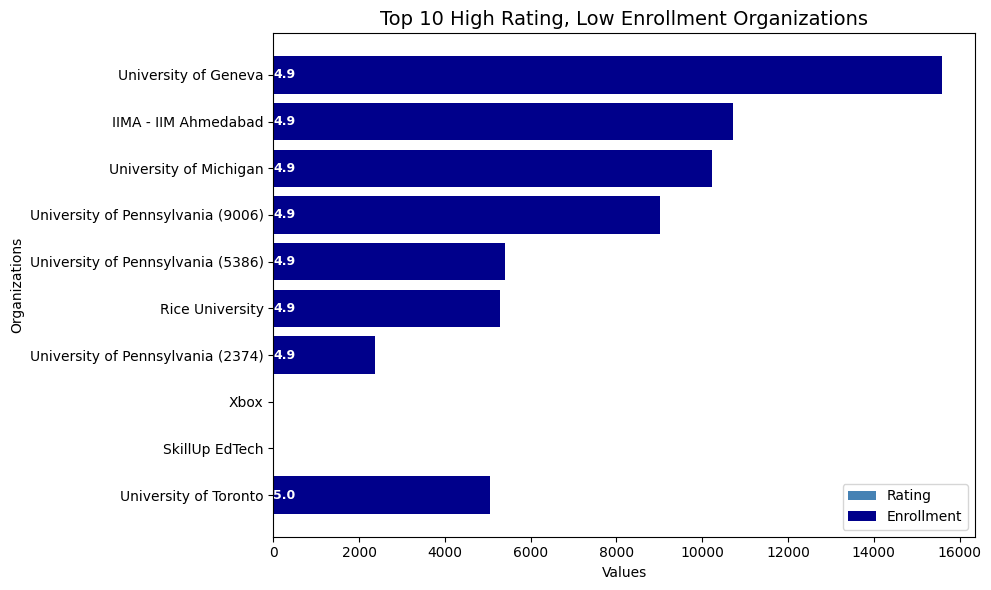

In [ ]:
top_10['Organization'] = top_10.apply(
    lambda row: f"{row['Organization']} ({row['Enroll Information']})"
    if list(top_10['Organization']).count(row['Organization']) > 1
    else row['Organization'],
    axis=1
)

organizations = top_10['Organization']
ratings = top_10['Rating']
enrollments = top_10['Enroll Information']

plt.figure(figsize=(10, 6))
bars_ratings = plt.barh(organizations, ratings, color='steelblue', label='Rating')
bars_enrollments = plt.barh(organizations, enrollments, left=ratings, color='darkblue', label='Enrollment')

for bar in bars_ratings:
    plt.text(
        bar.get_width() - 0.2,
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():.1f}',
        va='center', color='white', fontsize=9, weight='bold'
    )

plt.ylabel('Organizations')
plt.xlabel('Values')
plt.title('Top 10 High Rating, Low Enrollment Organizations', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
high_rating_high_enroll = df[
    (df['Rating'] >= 4.5) &
    (df['Enroll Information'] >= df['Enroll Information'].median())
]
high_rating_high_enroll_sorted = high_rating_high_enroll.sort_values(by=['Rating', 'Enroll Information'], ascending=[False, False])
top_10_high_rating_high_enroll = high_rating_high_enroll_sorted.head(10)
print("Top 10 High Rating, High Enrollment Organizations:")
print(top_10_high_rating_high_enroll[['Organization', 'Rating', 'Enroll Information']])

Top 10 High Rating, High Enrollment Organizations:
               Organization  Rating  Enroll Information
192         Yale University     4.9             4793429
862                  Google     4.9             2468706
20                   Google     4.9             2149345
450                  Google     4.9             1807675
795                  Google     4.9             1807675
394       Yonsei University     4.9             1604304
139         Yale University     4.9             1412128
124         DeepLearning.AI     4.9             1374794
906                  Google     4.9             1105689
406  University of Michigan     4.9             1077556


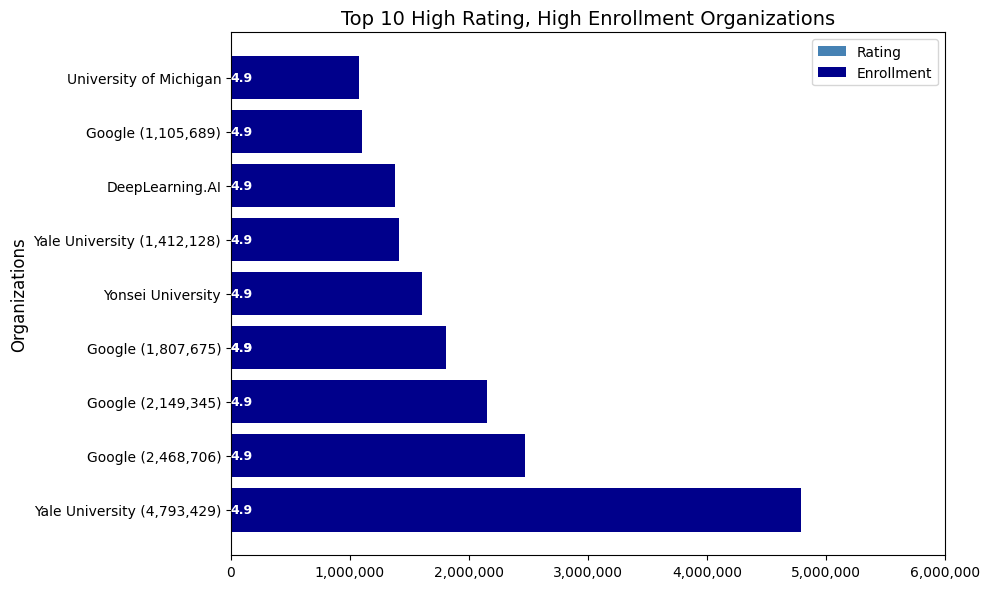

In [ ]:
organizations = top_10_high_rating_high_enroll['Organization']
ratings = top_10_high_rating_high_enroll['Rating']
enrollments = top_10_high_rating_high_enroll['Enroll Information']

plt.figure(figsize=(10, 6))
bars_ratings = plt.barh(organizations, ratings, color='steelblue', label='Rating')
bars_enrollments = plt.barh(
    organizations,
    enrollments,
    left=ratings,
    color='darkblue',
    label='Enrollment'
)

for bar, rating in zip(bars_ratings, ratings):
    plt.text(
        bar.get_width() - 0.1,
        bar.get_y() + bar.get_height() / 2,
        f'{rating:.1f}',
        va='center', color='white', fontsize=9, weight='bold'
    )

xticks = plt.xticks()[0]
plt.xticks(
    xticks,
    [f'{int(tick):,}' for tick in xticks],
    fontsize=10
)

plt.ylabel('Organizations', fontsize=12)
plt.title('Top 10 High Rating, High Enrollment Organizations', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

# Enrollments by Difficulty Level

In [ ]:
difficulty_stats = df.groupby('Difficulty')['Enroll Information'].sum().reset_index()
difficulty_stats = difficulty_stats.sort_values(by='Enroll Information', ascending=False)
print("Total Enrollments by Difficulty Level:")
print(difficulty_stats)

Total Enrollments by Difficulty Level:
     Difficulty  Enroll Information
1      Beginner           137599322
3         Mixed            25718331
2  Intermediate            17996104
0      Advanced             2053523


<ipython-input-73-7dcd1a13d5e9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=difficulty_stats, x='Difficulty', y='Enroll Information', palette=custom_palette)


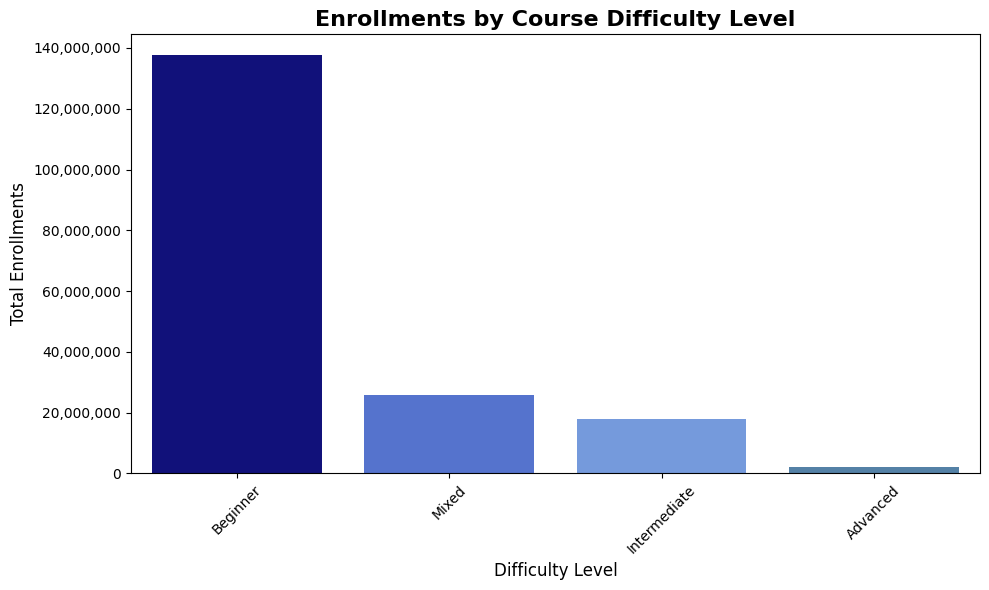

In [ ]:
custom_palette = ['darkblue', 'royalblue', 'cornflowerblue', 'steelblue']

plt.figure(figsize=(10, 6))
sns.barplot(data=difficulty_stats, x='Difficulty', y='Enroll Information', palette=custom_palette)
plt.title('Enrollments by Course Difficulty Level', fontsize=16, fontweight='bold')
plt.xlabel('Difficulty Level', fontsize=12)
plt.ylabel('Total Enrollments', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))
plt.tight_layout()
plt.show()

In [ ]:
difficulty_stats['Percentage'] = (difficulty_stats['Enroll Information'] / difficulty_stats['Enroll Information'].sum()) * 100
print(difficulty_stats)

     Difficulty  Enroll Information  Percentage
1      Beginner           137599322   75.040281
3         Mixed            25718331   14.025584
2  Intermediate            17996104    9.814239
0      Advanced             2053523    1.119896


<ipython-input-85-44d0a1e05afa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=difficulty_stats, x='Difficulty', y='Percentage', palette=custom_palette)


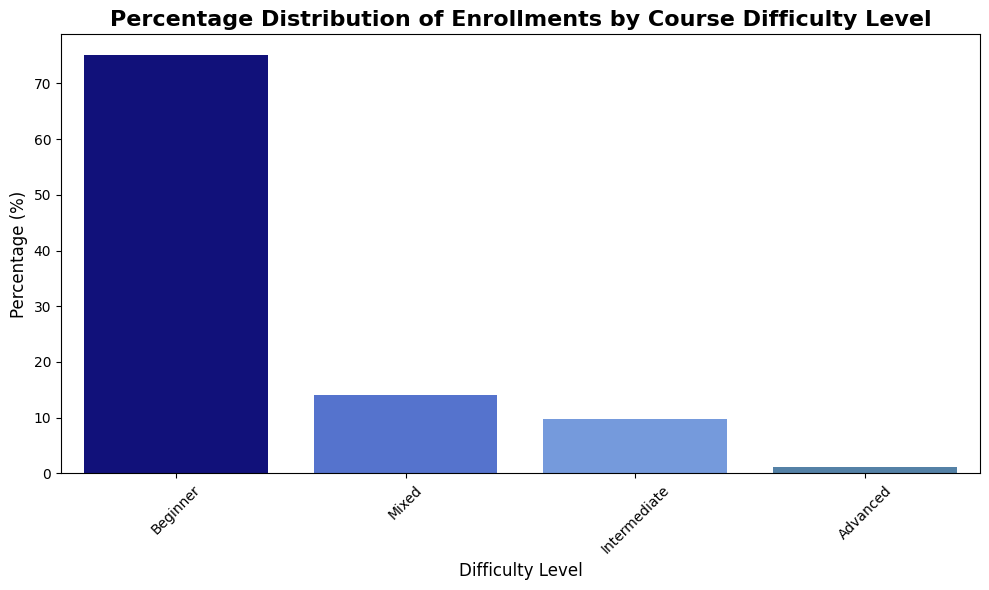

In [ ]:
custom_palette = ['darkblue', 'royalblue', 'cornflowerblue', 'steelblue']
plt.figure(figsize=(10, 6))
sns.barplot(data=difficulty_stats, x='Difficulty', y='Percentage', palette=custom_palette)
plt.title('Percentage Distribution of Enrollments by Course Difficulty Level', fontsize=16, fontweight='bold')
plt.xlabel('Difficulty Level', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
difficulty_rating_stats = df.groupby('Difficulty')['Rating'].mean().reset_index()
difficulty_rating_stats = difficulty_rating_stats.sort_values(by='Rating', ascending=False)
print("Average Ratings by Difficulty Level:")
print(difficulty_rating_stats)

Average Ratings by Difficulty Level:
     Difficulty    Rating
3         Mixed  4.732911
1      Beginner  4.697807
0      Advanced  4.662069
2  Intermediate  4.623858


<ipython-input-109-9ee261f0ce05>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=difficulty_rating_stats, x='Difficulty', y='Rating', palette='Blues_d')


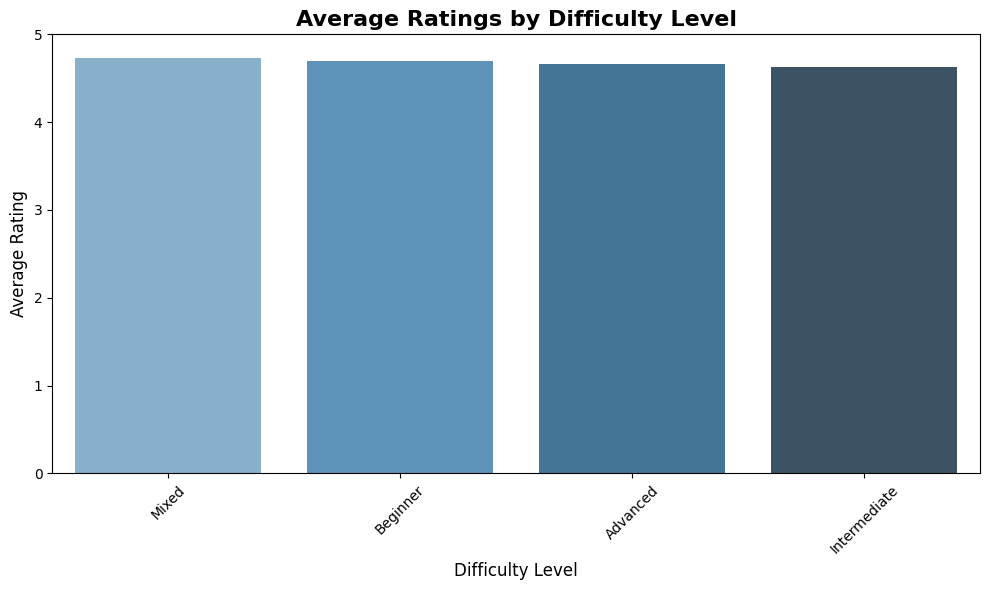

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=difficulty_rating_stats, x='Difficulty', y='Rating', palette='Blues_d')
plt.title('Average Ratings by Difficulty Level', fontsize=16, fontweight='bold')
plt.xlabel('Difficulty Level', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


# Enrollments by Number of Languages Available

In [ ]:
language_stats = df.groupby('Languages Available')['Enroll Information'].sum().reset_index()
language_stats = language_stats.sort_values(by='Enroll Information', ascending=False)
language_stats['Percentage'] = (language_stats['Enroll Information'] / language_stats['Enroll Information'].sum()) * 100
print("Enrollments by Number of Languages Available:")
print(language_stats)

Enrollments by Number of Languages Available:
    Languages Available  Enroll Information  Percentage
9                    22            81117236   44.237574
5                    11            57762762   31.501128
11                   24            22758345   12.411345
8                    21             9474452    5.166926
0                     0             6177212    3.368765
10                   23             2608210    1.422397
7                    20             1969513    1.074081
12                   25             1428511    0.779044
1                     3               33628    0.018339
4                     9               10512    0.005733
2                     4                9758    0.005322
3                     7                9582    0.005226
6                    13                7559    0.004122


<ipython-input-94-09806281560c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_stats, x='Languages Available', y='Enroll Information', palette='Blues_d')


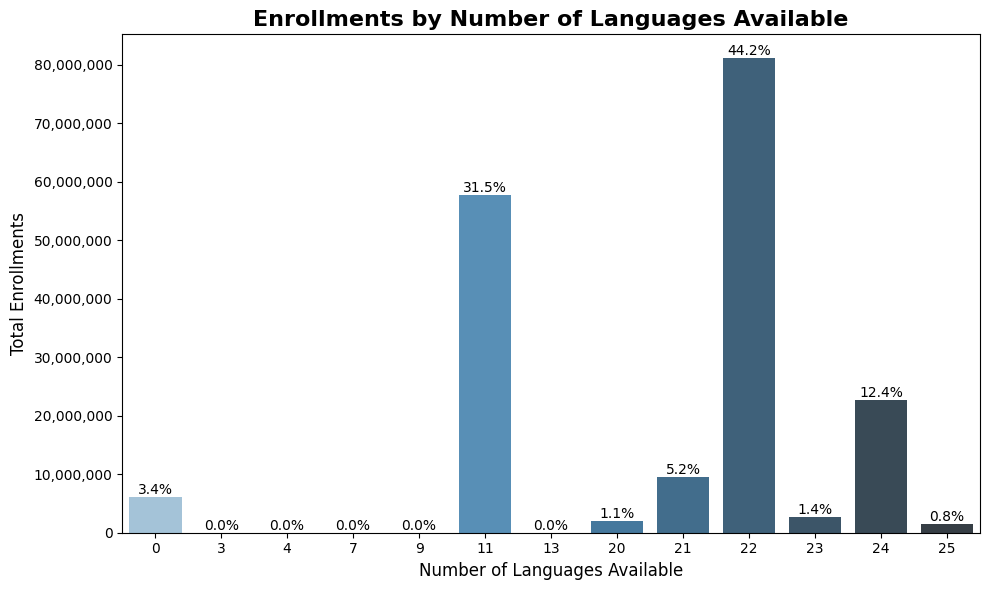

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=language_stats, x='Languages Available', y='Enroll Information', palette='Blues_d')
plt.title('Enrollments by Number of Languages Available', fontsize=16, fontweight='bold')
plt.xlabel('Number of Languages Available', fontsize=12)
plt.ylabel('Total Enrollments', fontsize=12)

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
for i, row in language_stats.iterrows():
    plt.text(
        x=i,
        y=row['Enroll Information'],
        s=f"{row['Percentage']:.1f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )
plt.tight_layout()
plt.show()

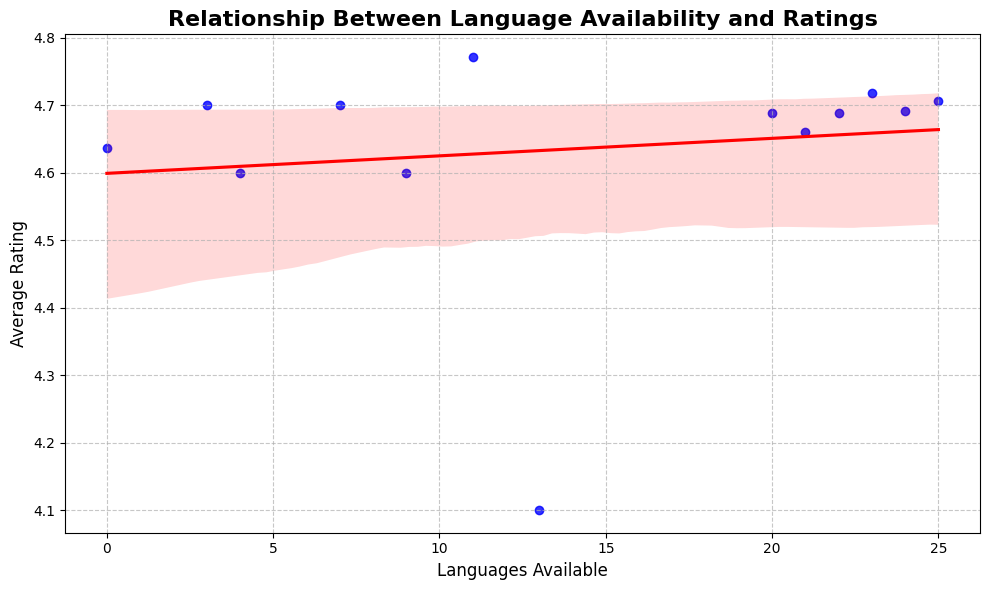

In [ ]:
language_rating_stats = df.groupby('Languages Available')['Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.regplot(data=language_rating_stats, x='Languages Available', y='Rating', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Relationship Between Language Availability and Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Languages Available', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Average Ratings by Skill Category

In [ ]:
skill_columns = ['Data Science Skills Count', 'Engineering and Programming Skills Count', 'Mathematical Theory and Problem Solving Skills Count']
skill_ratings = df[['Rating'] + skill_columns].melt(id_vars='Rating', var_name='Skill Category', value_name='Skill Count')
skill_rating_stats = skill_ratings.groupby(['Skill Category', 'Skill Count'])['Rating'].mean().reset_index()

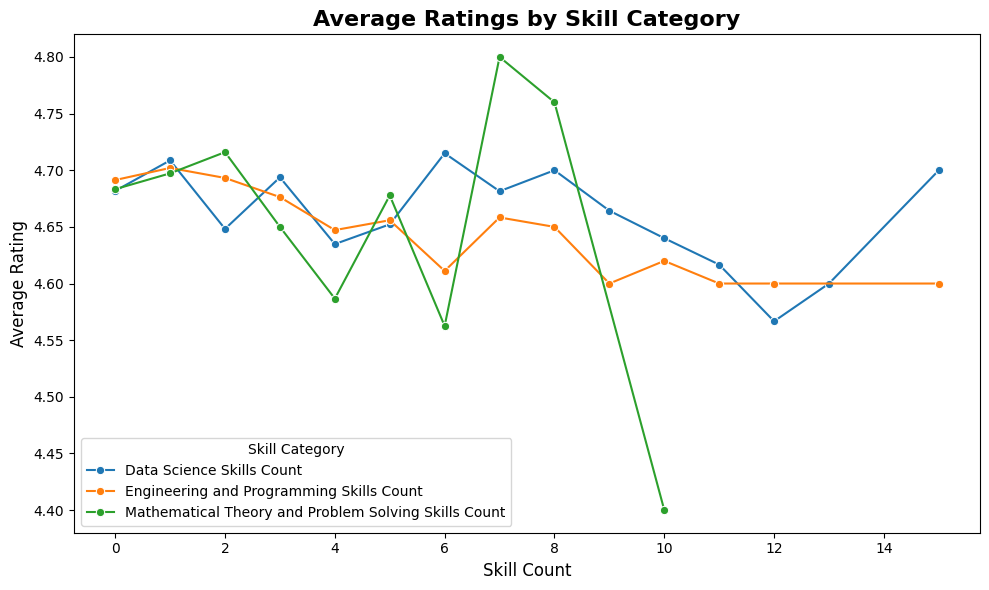

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=skill_rating_stats, x='Skill Count', y='Rating', hue='Skill Category', marker='o')
plt.title('Average Ratings by Skill Category', fontsize=16, fontweight='bold')
plt.xlabel('Skill Count', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.legend(title='Skill Category')
plt.tight_layout()
plt.show()

# Regression Model

In [ ]:
median_enrollment = df['Enroll Information'].median()
df['Enrollment Dummy'] = df['Enroll Information'].apply(lambda x: 1 if x >= median_enrollment else 0)
print("Median Enrollment:", median_enrollment)
df.head(13)

Median Enrollment: 54866.0


,Title,Organization,URL,Rating,Languages Available,Enroll Information,Taught Language,Difficulty,Type,Duration,Data Science Skills Count,Engineering and Programming Skills Count,Mathematical Theory and Problem Solving Skills Count,Skills Count,Quizzes,Assignments,Enrollment Dummy
0,Google Data Analytics,Google,https://www.coursera.org/professional-certific...,4.8,11,2468706,English,Beginner,Professional Certificate,3 - 6 Months,9,3,1,25,0,0,1
1,Google Cybersecurity,Google,https://www.coursera.org/professional-certific...,4.8,11,759433,English,Beginner,Professional Certificate,3 - 6 Months,6,6,0,13,0,0,1
2,Google Project Management:,Google,https://www.coursera.org/professional-certific...,4.8,11,1807675,English,Beginner,Professional Certificate,3 - 6 Months,1,2,1,24,0,0,1
3,Google Digital Marketing & E-commerce,Google,https://www.coursera.org/professional-certific...,4.8,11,831347,English,Beginner,Professional Certificate,3 - 6 Months,3,0,1,19,0,0,1
4,Google IT Support,Google,https://www.coursera.org/professional-certific...,4.8,11,1695991,English,Beginner,Professional Certificate,3 - 6 Months,2,6,2,19,0,0,1
5,Google UX Design,Google,https://www.coursera.org/professional-certific...,4.8,11,1105689,English,Beginner,Professional Certificate,3 - 6 Months,1,1,0,11,0,0,1
6,Machine Learning,"DeepLearning.AI, Stanford University",https://www.coursera.org/specializations/machi...,4.9,21,533425,English,Beginner,Specialization,1 - 3 Months,6,2,2,17,0,0,1
7,Deep Learning,DeepLearning.AI,https://www.coursera.org/specializations/deep-...,4.8,22,889704,English,Intermediate,Specialization,3 - 6 Months,11,3,4,24,0,0,1
8,Google AI Essentials,Google,https://www.coursera.org/learn/google-ai-essen...,4.7,11,897465,English,Beginner,Course,1 - 3 Months,1,0,1,1,0,12,1
9,IBM Data Science,IBM,https://www.coursera.org/professional-certific...,4.6,24,657138,English,Beginner,Professional Certificate,3 - 6 Months,13,6,1,25,0,0,1


In [ ]:
df.rename(columns={"Enrollment Dummy": "Enrollment_Dummy"}, inplace=True)
df.rename(columns={"Taught Language": "Taught_Language"}, inplace=True)
df.rename(columns={"Skills Count": "Skills_Count"}, inplace=True)
formula = (
    'Enrollment_Dummy ~ C(Difficulty, Treatment(reference="Beginner")) + '
    'C(Taught_Language, Treatment(reference="English")) + '
    'Rating + Skills_Count + Quizzes + Type'
)

logit_model = smf.logit(formula, data=df)
logit_result = logit_model.fit()
print(logit_result.summary())

         Current function value: 0.582914
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:       Enrollment_Dummy   No. Observations:                  989
Model:                          Logit   Df Residuals:                      975
Method:                           MLE   Df Model:                           13
Date:                Sun, 12 Jan 2025   Pseudo R-squ.:                  0.1590
Time:                        14:07:17   Log-Likelihood:                -576.50
converged:                      False   LL-Null:                       -685.52
Covariance Type:            nonrobust   LLR p-value:                 2.645e-39
                                                                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------
Intercept         

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df[['Rating', 'Skills_Count', 'Quizzes', 'Assignments']])
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


       Variable         VIF
0         const  728.620201
1        Rating    1.016378
2  Skills_Count    1.036178
3       Quizzes    1.022327
4   Assignments    1.034498


In [ ]:
marginal_effects = logit_result.get_margeff()
print(marginal_effects.summary())

        Logit Marginal Effects       
Dep. Variable:       Enrollment_Dummy
Method:                          dydx
At:                           overall
                                                                               dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------
C(Difficulty, Treatment(reference="Beginner"))[T.Advanced]                   -0.1077      0.093     -1.164      0.244      -0.289       0.074
C(Difficulty, Treatment(reference="Beginner"))[T.Intermediate]               -0.0427      0.037     -1.167      0.243      -0.114       0.029
C(Difficulty, Treatment(reference="Beginner"))[T.Mixed]                       0.1101      0.062      1.777      0.076      -0.011       0.232
C(Taught_Language, Treatment(reference="English"))[T.French]                 -0.5539      0.212     -2.615      0.009      -0.969      -0.